# Hopf normal form:

x' = αx - y - x(x²-y²)

y' = x + αy - y(x²-y²)

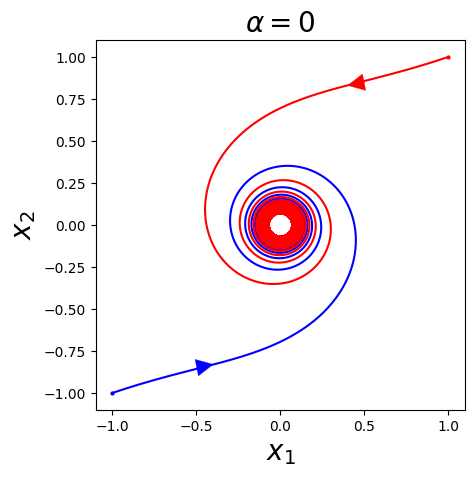

In [ ]:
import pylab
from matplotlib.pyplot import *
from matplotlib.patches import FancyArrowPatch

Dt = .01
r = 0

def add_arrow(line, position=None, direction='right', size=15, color=None):

    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

def initialize():
  global x, xresult, y, yresult, x1, y1, x1result, y1result
  x=y=-1
  x1=y1=1

  plot(x, y, marker="o", markersize=2, markeredgecolor="b", markerfacecolor="b")
  plot(x1, y1, marker="o", markersize=2, markeredgecolor="r", markerfacecolor="r")

  xresult = [x]
  yresult = [y]

  x1result = [x1]
  y1result = [y1]

def observe():
  global x, xresult, y, yresult, x1, y1, x1result, y1result
  xresult.append(x)
  yresult.append(y)

  x1result.append(x1)
  y1result.append(y1)


def update():
  global x, xresult, y, yresult, x1result, y1result, x1, y1

  nextx = x + (r*x - y - x*(x**2+y**2)) * Dt
  nexty = y + ( x + r*y - y*(x**2 + y**2)) * Dt

  x, y = nextx, nexty

  nextx1 = x1 + (r*x1 - y1 - x1*(x1**2+y1**2)) * Dt
  nexty1 = y1 + ( x1 + r*y1 - y1*(x1**2 + y1**2)) * Dt

  x1, y1 = nextx1, nexty1

def plot_phase_space():

  initialize()

  for t in range(100000):
    update()
    observe()

  plot(xresult, yresult, 'b')

  plot(x1result, y1result, 'r')

  plt.xlabel(r'$x_1$',size=20);
  plt.ylabel(r'$x_2$',size=20);

  axis('image')
  axis([-1.1, 1.1, -1.1, 1.1])

  title(r'$\alpha = $' + str(r),size=20)

plt.arrow(.5, 0.85,-0.1, -.02, head_width=0.1, head_length=0.1, linewidth=.2, color='r', length_includes_head=True)
plt.arrow(-.5, -0.85,0.1, .02, head_width=0.1, head_length=0.1, linewidth=.2, color='b', length_includes_head=True)


plot_phase_space()
show()

<ipython-input-106-612b4f83193c>:54: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


<Figure size 2400x2000 with 0 Axes>

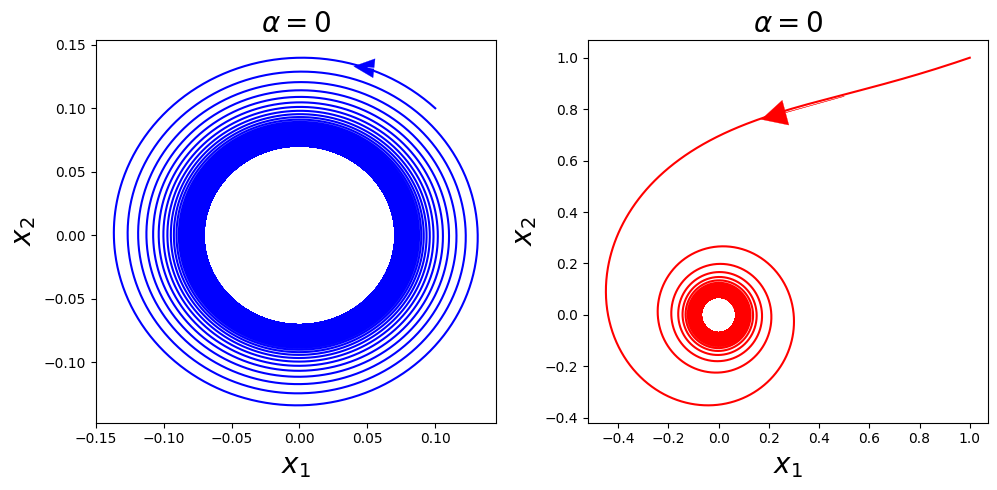

In [ ]:
Dt = .01
r = 0
import matplotlib.pyplot as plt

def initialize():
  global x, xresult, y, yresult, x1, y1, x1result, y1result
  x=y=0.1
  x1=y1=1

  plot(x, y, marker="o", markersize=2, markeredgecolor="b", markerfacecolor="b")
  plot(x1, y1, marker="o", markersize=2, markeredgecolor="r", markerfacecolor="r")

  xresult = [x]
  yresult = [y]

  x1result = [x1]
  y1result = [y1]

def observe():
  global x, xresult, y, yresult, x1, y1, x1result, y1result
  xresult.append(x)
  yresult.append(y)

  x1result.append(x1)
  y1result.append(y1)


def update():
  global x, xresult, y, yresult, x1result, y1result, x1, y1

  nextx = x + (r*x - y - x*(x**2+y**2)) * Dt
  nexty = y + ( x + r*y - y*(x**2 + y**2)) * Dt
  x, y = nextx, nexty

  nextx1 = x1 + (r*x1 - y1 - x1*(x1**2+y1**2)) * Dt
  nexty1 = y1 + ( x1 + r*y1 - y1*(x1**2 + y1**2)) * Dt

  x1, y1 = nextx1, nexty1

def plot_phase_space():

  initialize()

  for t in range(100000):
    update()
    observe()





plt.figure(figsize=[12,10],dpi=200)
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(131)
plt.plot(xresult, yresult, 'b')
plt.xlabel(r'$x_1$',size=20);
plt.ylabel(r'$x_2$',size=20);
plt.arrow(0.05, 0.132,-0.01, 0.001, head_width=0.015, head_length=0.015, linewidth=.2, color='b', length_includes_head=True)

plt.title(r'$\alpha = $' + str(r),size=20)
plt.subplot(132)
plt.plot(x1result, y1result, 'r')
plt.xlabel(r'$x_1$',size=20);
plt.ylabel(r'$x_2$',size=20);

plt.title(r'$\alpha = $' + str(r),size=20)
plt.arrow(0.5, 0.85,-0.33, -0.09, head_width=0.1, head_length=0.1, linewidth=.2, color='r', length_includes_head=True)
plt.tight_layout()
#plt.savefig("choice.pdf",dpi=200,format="pdf")
